## CONCOLUTION NEURAL NETWORK TO RECOGNISE FACIAL EXPRESSIONS

## STEP 1: IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [3]:
from sklearn.preprocessing import MinMaxScaler

## STEP 2: LOAD DATASET

Import training set

In [4]:
train_data_object = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip = True)
training_set = train_data_object.flow_from_directory('dataset/training_set', target_size = (64, 64), 
                                                     batch_size = 1, class_mode = 'binary')

Found 30 images belonging to 2 classes.


Import test set

In [5]:
test_data_object = ImageDataGenerator(rescale=1./255)
test_set = train_data_object.flow_from_directory('dataset/test_set', target_size = (64, 64), 
                                                     batch_size = 1, class_mode = 'binary')

Found 10 images belonging to 2 classes.


## STEP 3: BUILDING CNN MODEL

Build model structure

In [6]:
model = 0

In [7]:
model = Sequential()

In [8]:
model.add(Conv2D(filters=32, kernel_size=2, activation='relu', input_shape=[64, 64, 3]))

In [9]:
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [10]:
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))

In [11]:
model.add(MaxPool2D(pool_size = 2, strides = 2))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(units = 120, activation = 'relu'))

In [14]:
from tensorflow.keras.layers import Dropout

In [15]:
model.add(Dropout(0.2))

In [16]:
model.add(Dense(units = 80, activation = 'relu'))

In [17]:
model.add(Dropout(0.3))

In [18]:
model.add(Dense(units = 80, activation = 'relu'))

In [19]:
model.add(Dense(units = 1, activation = 'sigmoid'))

Compile model

In [20]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fit the model

In [21]:
model.fit(x = training_set, validation_data = test_set, epochs = 100)

Epoch 1/100
30/30 [==============================] - 12s 333ms/step - loss: 0.8291 - accuracy: 0.5333 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/100
30/30 [==============================] - 8s 264ms/step - loss: 0.7009 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/100
30/30 [==============================] - 9s 287ms/step - loss: 0.6927 - accuracy: 0.5000 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 4/100
30/30 [==============================] - 9s 305ms/step - loss: 0.6859 - accuracy: 0.5333 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 5/100
30/30 [==============================] - 8s 280ms/step - loss: 0.7111 - accuracy: 0.5333 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 6/100
30/30 [==============================] - 8s 279ms/step - loss: 0.6956 - accuracy: 0.5000 - val_loss: 0.6908 - val_accuracy: 0.7000
Epoch 7/100
30/30 [==============================] - 8s 278ms/step - loss: 0.8478 - accuracy: 0.6000 - val_loss: 0.6939 - val_accuracy: 0.500

Epoch 58/100
30/30 [==============================] - 8s 269ms/step - loss: 0.0321 - accuracy: 0.9667 - val_loss: 0.9111 - val_accuracy: 0.7000
Epoch 59/100
30/30 [==============================] - 9s 294ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.6370 - val_accuracy: 0.9000
Epoch 60/100
30/30 [==============================] - 11s 380ms/step - loss: 0.1292 - accuracy: 0.9667 - val_loss: 0.3369 - val_accuracy: 0.8000
Epoch 61/100
30/30 [==============================] - 8s 255ms/step - loss: 0.5527 - accuracy: 0.8333 - val_loss: 0.7681 - val_accuracy: 0.6000
Epoch 62/100
30/30 [==============================] - 8s 261ms/step - loss: 0.2146 - accuracy: 0.9333 - val_loss: 0.9484 - val_accuracy: 0.6000
Epoch 63/100
30/30 [==============================] - 8s 262ms/step - loss: 0.2234 - accuracy: 0.9333 - val_loss: 0.1916 - val_accuracy: 0.9000
Epoch 64/100
30/30 [==============================] - 8s 276ms/step - loss: 0.2816 - accuracy: 0.8333 - val_loss: 0.3041 - val_accuracy

## STEP 4: ASSESSING MODEL PERFORMANCE

In [22]:
model_performance = pd.DataFrame(model.history.history)
model_performance.head()

,loss,accuracy,val_loss,val_accuracy
0,0.829083,0.533333,0.694998,0.5
1,0.700867,0.500000,0.693436,0.5
2,0.692739,0.500000,0.693634,0.5
3,0.685896,0.533333,0.694489,0.5
4,0.711087,0.533333,0.702107,0.5


In [23]:
plt.style.use('fivethirtyeight')

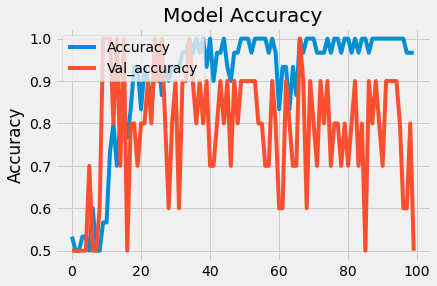

In [24]:
plt.plot(model_performance['accuracy'])
plt.plot(model_performance['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Accuracy','Val_accuracy'], loc = 'upper left')
plt.style.use('fivethirtyeight')

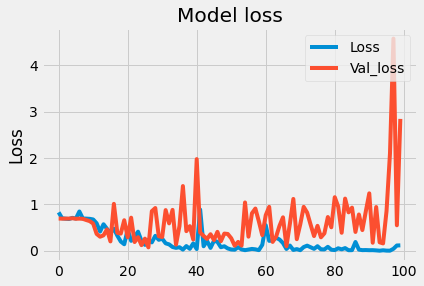

In [25]:
plt.plot(model_performance['loss'])
plt.plot(model_performance['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.legend(['Loss','Val_loss'], loc = 'upper right')
plt.style.use('fivethirtyeight')

## STEP 5: MAKING PREDICTIONS

Predict first image where the correct emotion is: Happy

Check dataset indices

In [26]:
training_set.class_indices

{'angry': 0, 'happy': 1}

In [27]:
happy_image = image.load_img('dataset/prediction/20210918_184511.jpg', target_size = (64, 64, 3))
happy_image = image.img_to_array(happy_image)
happy_image = np.expand = np.expand_dims(happy_image, axis = 0)

This guy is Happy


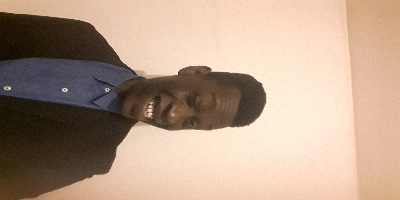

In [28]:
happy_image_pred = model.predict(happy_image)
if happy_image_pred[0][0] >= 0.5:
    print('This guy is Happy')
else:
    print('This guy is Angry')
image.load_img('dataset/prediction/20210918_184511.jpg', target_size = (200, 400, 3))

Predict first image where the correct emotion is: Angry

In [31]:
angry_image = image.load_img('dataset/prediction/20210918_184615.jpg', target_size = (64, 64, 3))
angry_image = image.img_to_array(angry_image)
angry_image = np.expand = np.expand_dims(angry_image, axis = 0)

This guy is Angry


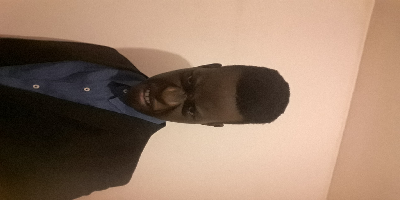

In [32]:
angry_image_pred = model.predict(angry_image)
if angry_image_pred[0][0] >= 0.5:
    print('This guy is Happy')
else:
    print('This guy is Angry')
image.load_img('dataset/prediction/20210918_184615.jpg', target_size = (200, 400, 3))